In [89]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import os

/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/pytho

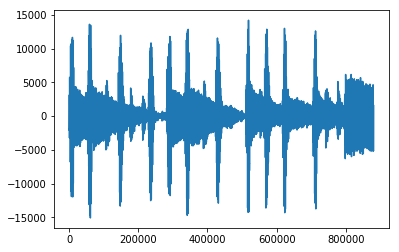

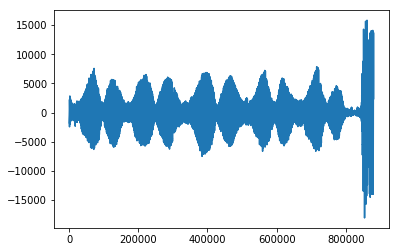

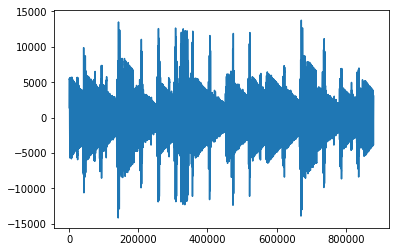

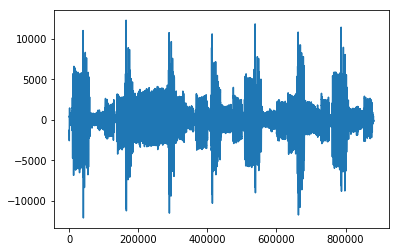

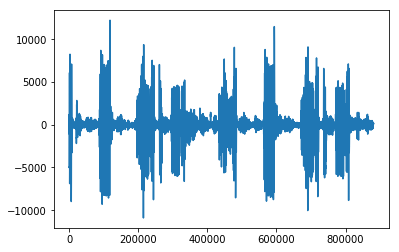

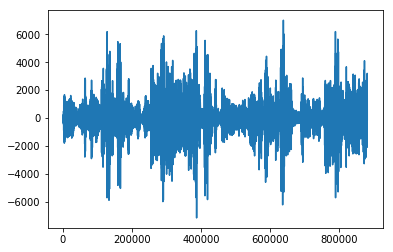

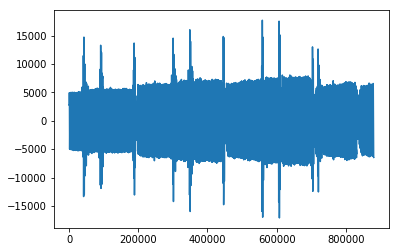

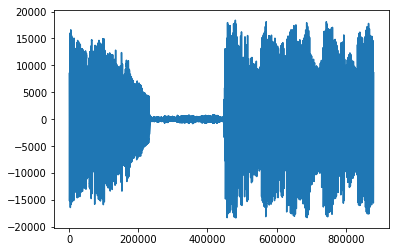

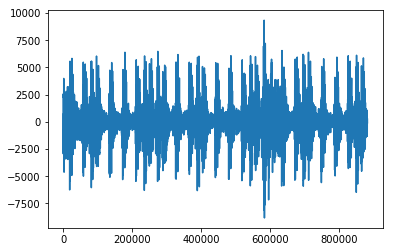

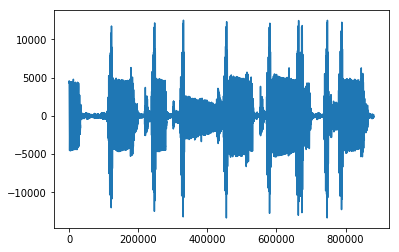

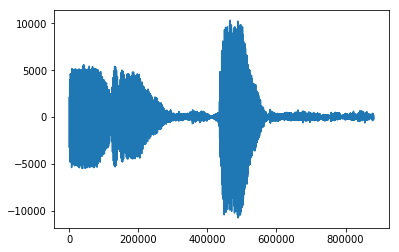

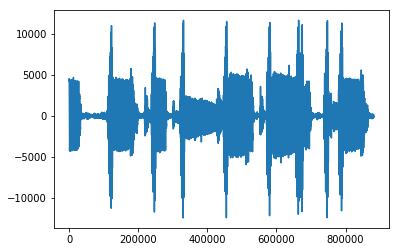

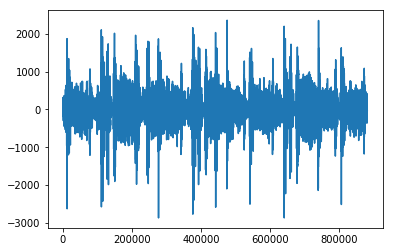

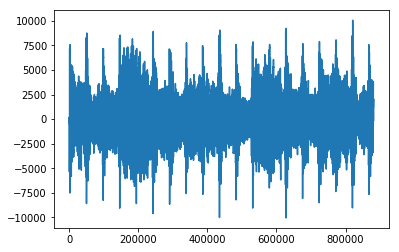

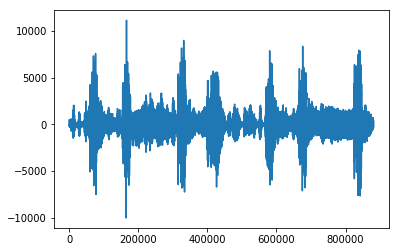

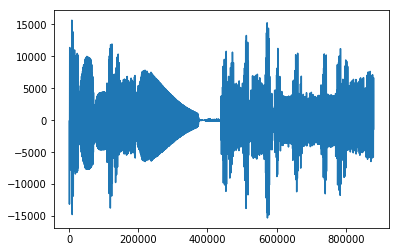

In [91]:
# hip hop

song_folder = "../additional/data/hip_hop/mp3_files/"
img_folder = "../additional/data/hip_hop/img/"

if not os.path.exists(img_folder):
    os.makedirs(img_folder)

song_files = [f for f in listdir(song_folder) if isfile(join(song_folder, f))]

for f in song_files:
    song = AudioSegment.from_mp3(join(song_folder, f))
    song_middle = len(song)//2
    sample_duration = 10*1000 # 30 secs
    sample_start = song_middle - sample_duration/2
    sample_end = song_middle + sample_duration/2
    song = song[sample_start:sample_end]
    song = song.raw_data
    song = np.fromstring(song, 'Int16')

    song = np.convolve(song, np.ones((1*1000,))/(1*1000), mode='valid')

    plt.figure()
    plt.plot(song)
    plt.savefig(join(img_folder, f + '.png'))
#     plt.show()

/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/jharmse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/home/jharmse/anaconda3/lib/pytho

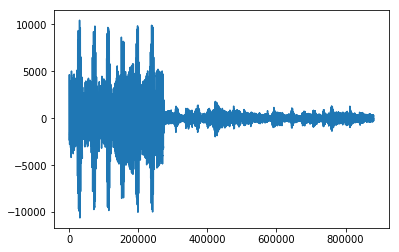

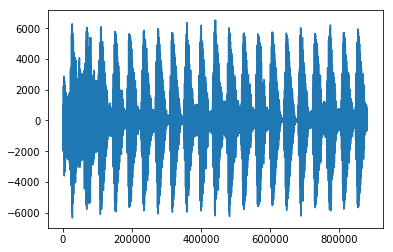

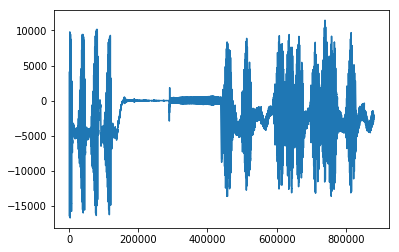

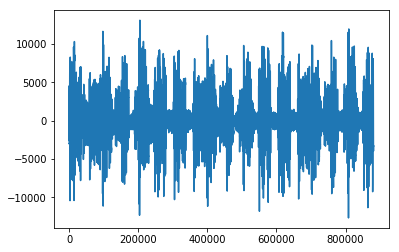

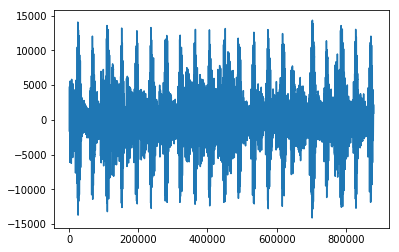

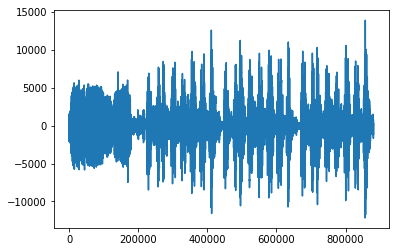

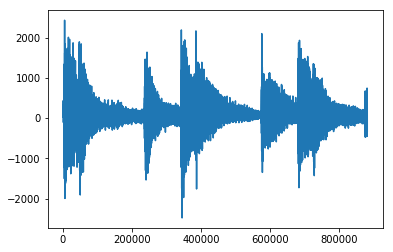

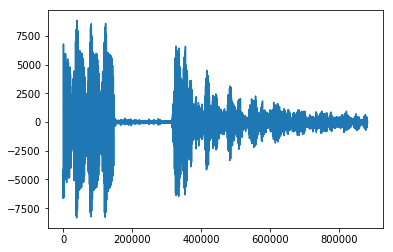

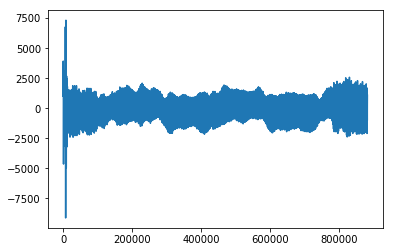

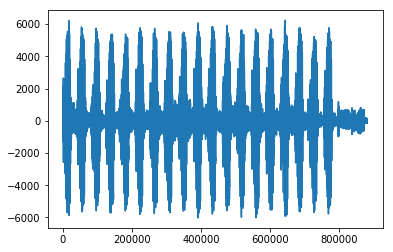

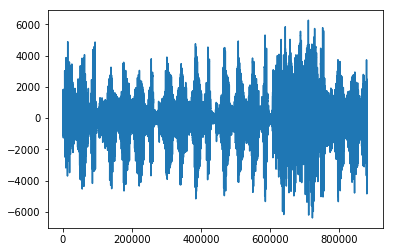

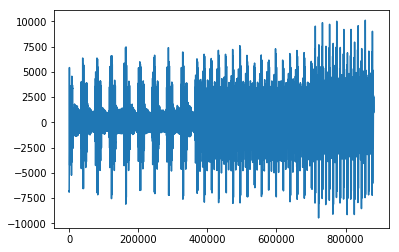

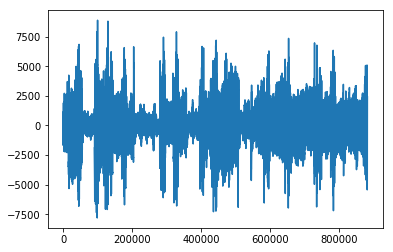

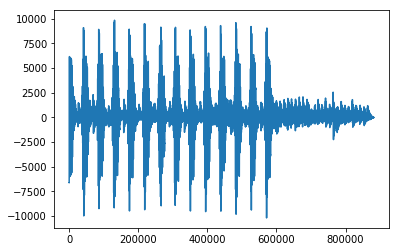

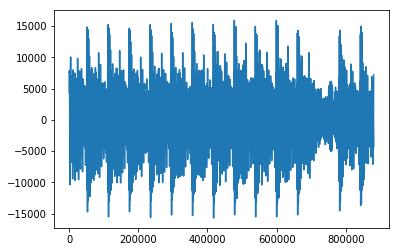

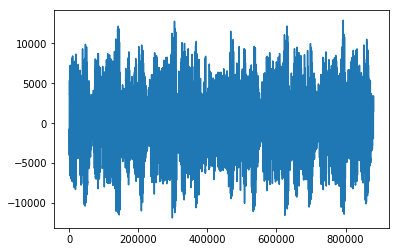

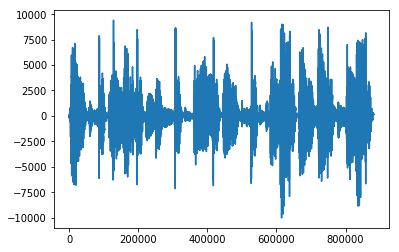

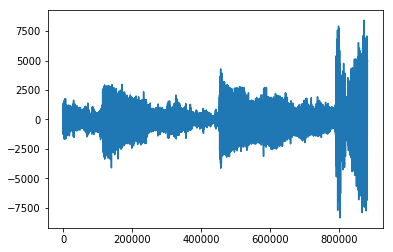

In [92]:
# electro

song_folder = "../additional/data/electro/mp3_files/"
img_folder = "../additional/data/electro/img/"

if not os.path.exists(img_folder):
    os.makedirs(img_folder)

song_files = [f for f in listdir(song_folder) if isfile(join(song_folder, f))]

for f in song_files:
    song = AudioSegment.from_mp3(join(song_folder, f))
    song_middle = len(song)//2
    sample_duration = 10*1000 # 30 secs
    sample_start = song_middle - sample_duration/2
    sample_end = song_middle + sample_duration/2
    song = song[sample_start:sample_end]
    song = song.raw_data
    song = np.fromstring(song, 'Int16')

    song = np.convolve(song, np.ones((1*1000,))/(1*1000), mode='valid')

    plt.figure()
    plt.plot(song)
    plt.savefig(join(img_folder, f + '.png'))
#     plt.show()